#Notebook description

This notebook explores Slotine's paper on contraction analysis

# Review

Slotine analyzes nonlinear systems of the form

$$\dot{\mathbf{x}}=\mathbf{f}(\mathbf{x},t)$$

and examines virtual (differential) displacements $\delta\mathbf{x}$, and the squared displacement

$$\delta\mathbf{x}^T\delta\mathbf{x}$$

He says that 

$$\delta\dot{\mathbf{x}}=\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x}$$

so that

\begin{align}
\frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) &= 2\delta\mathbf{x}^T\delta\dot{\mathbf{x}} \\
 &= 2\delta\mathbf{x}^T\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x} \\
\end{align}

Only the symmetric part of $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$ affects the quadratic form ([proof](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/theory/linear_algebra.ipynb#Only-symmetric-matrices-affect-the-quadratic-form
)). Using linear algebra,

$$
\frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) \le 2\lambda_{max}\delta\mathbf{x}^T\delta\mathbf{x}
$$

where $\lambda_{max}$ is the maximum eigenvalue of the symmetric part of $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$. Starting with $\delta\mathbf{x}_0$, we'll then have

$$
\|\delta\mathbf{x}\| \le \|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt}
$$

Actually, using linear algebra we make the stronger statement that

\begin{align}
2\lambda_{min}\delta\mathbf{x}^T\delta\mathbf{x} \le& \frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) \le
    2\lambda_{max}\delta\mathbf{x}^T\delta\mathbf{x} \\
\|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{min}(\mathbf{x},t)dt} \le& \|\delta\mathbf{x}\| \le
    \|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt} \\
\end{align}

# Claims to test

We will test three claims:
- $\frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) = 
     2\delta\mathbf{x}^T\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x}$


 - $2\lambda_{min}\delta\mathbf{x}^T\delta\mathbf{x} \le \frac{d}{dt}(\delta\mathbf{x}^T\delta\mathbf{x}) \le
    2\lambda_{max}\delta\mathbf{x}^T\delta\mathbf{x} $


 - $\|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{min}(\mathbf{x},t)dt} \le \|\delta\mathbf{x}\| \le
    \|\delta\mathbf{x}_0\|e^{\int_0^t2\lambda_{max}(\mathbf{x},t)dt}$

# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from utils.contraction import sim_sys, sim_linear_sys, phase, plot_linear_contraction, plot_nonlinear_contraction

# Linear test
Here we'll look at the linear case of 

$$\mathbf{f}(\mathbf{x}, t)=A\mathbf{x}$$

so that

$$\frac{\partial\mathbf{f}}{\partial\mathbf{x}} = A$$

Here, we will use 

$$A=\begin{bmatrix}
-1.5 & 0.5 \\
0.5 & -1.5 \\
\end{bmatrix}$$

which has eigenvalues of $-2$ and $-1$ and is hence negative definite so the system is contraction.

We will run the system using two trajectories, defined by their initial conditions.

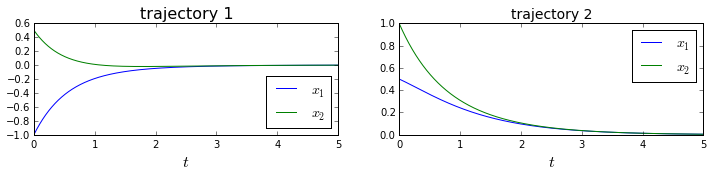

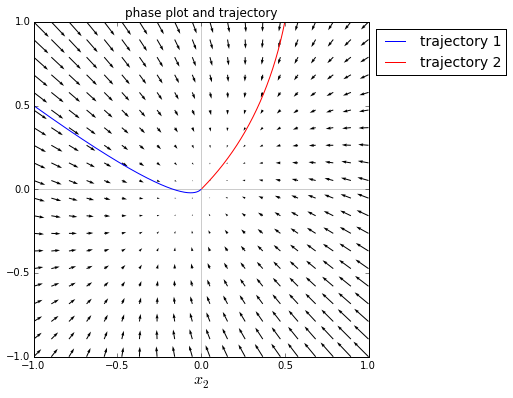

In [3]:
P = np.array([
    [1,-1],
    [1,1]], dtype=float)
P /= np.sqrt(2.)
lam = np.diag([-1, -2])
A = P.dot(lam).dot(P.T)

dt = 1e-4
T = 5.
N = int(np.ceil(T/dt))
t = np.arange(N)*dt

# simulate two trajectories
x0 = np.array([-1., .5])
x = sim_linear_sys(A, dt, x0, N)
y0 = np.array([.5, 1.])
y = sim_linear_sys(A, dt, y0, N)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,2))
ax1.plot(t, x[:,0], label=r'$x_1$')
ax1.plot(t, x[:,1], label=r'$x_2$')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel(r'$t$', fontsize=16)
ax1.set_title('trajectory 1', fontsize=16)
ax2.plot(t, y[:,0], label=r'$x_1$')
ax2.plot(t, y[:,1], label=r'$x_2$')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlabel(r'$t$', fontsize=16)
ax2.set_title('trajectory 2', fontsize=14)

fig, ax = phase(A, x1lim=(-1, 1), x2lim=(-1, 1), n1=20, n2=20)
ax.plot(x[:,0], x[:,1], 'b', label='trajectory 1')
ax.plot(y[:,0], y[:,1], 'r', label='trajectory 2')
ax.set_xlabel(r'$x_1$', fontsize=16)
ax.set_xlabel(r'$x_2$', fontsize=16)
ax.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
ax.set_title('phase plot and trajectory');

First, we compare the trajectory 1 of to the trajectory of constant $\mathbf{0}$. Here, $\delta\mathbf{x}(t)=x(t)$.

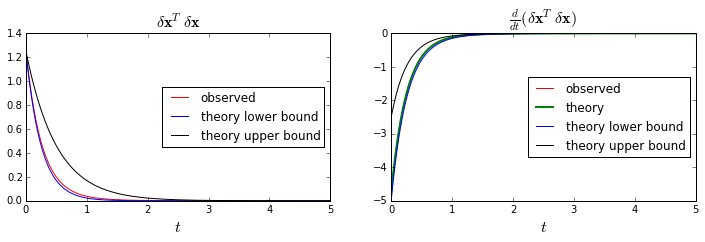

In [4]:
plot_linear_contraction(x, A, dt)

The theoretical bounds hold and the observed time derivative matches the numerical time derivative.

Next, we compare trajectory 1 to the trajectory 2. Here, $\delta\mathbf{x}(t)=\mathbf{x}_1(t)-\mathbf{x}_2(t)$ where $\mathbf{x}_1(t)$ and $\mathbf{x}_2(t)$ are the two trajectories.

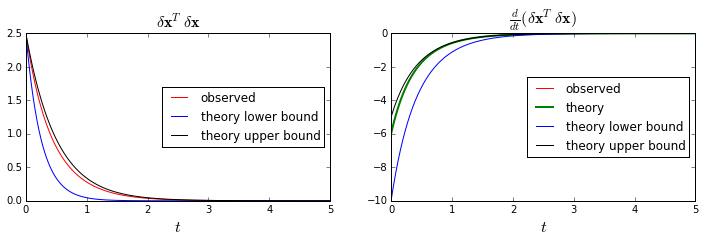

In [5]:
plot_linear_contraction(y-x, A, dt)

Again, the theoretical bounds hold and the observed time derivative matches the numerical time derivative.

# Nonlinear test

Now, we'll use Slotine's analysis on 

\begin{align}
\mathbf{f}(\mathbf{x}, t) &=
    \begin{bmatrix}
    -1.5x_1|x_1| + 0.5x_2|x_2| \\
    0.5x_1|x_1| - 1.5x_2|x_2| \\
    \end{bmatrix} \\
 &=
    \begin{bmatrix}
    -1.5 & 0.5 \\
    0.5 & -1.5 \\
    \end{bmatrix}
    \begin{bmatrix}
    x_1|x_1| \\
    x_2|x_2| \\
    \end{bmatrix} \\
 &= A\hat{\mathbf{x}} \\
\end{align}

where 
$\hat{\mathbf{x}}=
\begin{bmatrix}
    x_1|x_1| \\
    x_2|x_2| \\
\end{bmatrix}$
and $A$ is the same as above. Note that $x|x|$ is the same as the more familiar $x^2$ except that it preserves the sign of $x$.

$$\frac{d}{dx}x|x| = 2|x|$$

so

$$
\frac{\partial\mathbf{f}}{\partial\mathbf{x}} = 
\begin{bmatrix}
-3|x_1| & |x_2| \\
|x_1| & -3|x_2| \\
\end{bmatrix}
$$

I'm pretty sure this is negative definite, [TODO] but how do I show this?

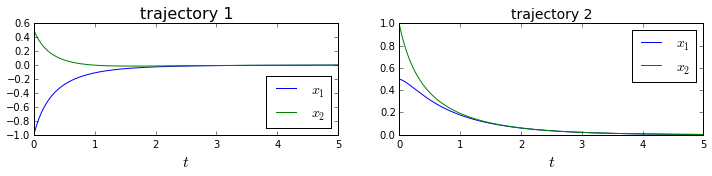

In [26]:
P = np.array([
    [1,-1],
    [1,1]], dtype=float)
P /= np.sqrt(2.)
lam = np.diag([-1, -2])
A = P.dot(lam).dot(P.T)

dt = 1e-3
T = 5.
N = int(np.ceil(T/dt))
t = np.arange(N)*dt

f = lambda x: A.dot(x*np.abs(x))+A.dot(x)

# simulate two trajectories
x0 = np.array([-1., .5])
x = sim_sys(f, dt, x0, N)
y0 = np.array([.5, 1.])
y = sim_sys(f, dt, y0, N)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,2))
ax1.plot(t, x[:,0], label=r'$x_1$')
ax1.plot(t, x[:,1], label=r'$x_2$')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlabel(r'$t$', fontsize=16)
ax1.set_title('trajectory 1', fontsize=16)
ax2.plot(t, y[:,0], label=r'$x_1$')
ax2.plot(t, y[:,1], label=r'$x_2$')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlabel(r'$t$', fontsize=16)
ax2.set_title('trajectory 2', fontsize=14)

# fig, ax = phase(A, x1lim=(-1, 1), x2lim=(-1, 1), n1=20, n2=20)
# ax.plot(x[:,0], x[:,1], 'b', label='trajectory 1')
# ax.plot(y[:,0], y[:,1], 'r', label='trajectory 2')
# ax.set_xlabel(r'$x_1$', fontsize=16)
# ax.set_xlabel(r'$x_2$', fontsize=16)
# ax.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize=14)
# ax.set_title('phase plot and trajectory');

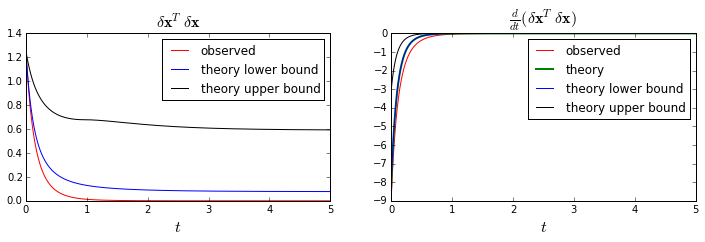

In [34]:
AJ = np.array([
    [-3., 1.],
    [1., -3.]])
dfdx = lambda x: AJ*np.abs(x)
plot_nonlinear_contraction(x, x, dfdx, dt)

# Picking a metric

Slotine generalizes the definition of differential length using the coordinate transformation.

$$\delta\mathbf{z} = \mathbf{\Theta}\delta\mathbf{x}$$

where $\mathbf{\Theta}(\mathbf{x}, t)$ is a square matrix. Consequentially,

$$\delta\mathbf{z}^T\delta\mathbf{z}=\delta\mathbf{x}^T\mathbf{M}\delta\mathbf{x}$$

where $\mathbf{M}=\mathbf{\Theta}^T\mathbf{\Theta}$ represents a symmetric and continuously differentiable _metric_. $\mathbf{M}$ is also assumed to be __uniformly positive definite__ so that exponential convergence of $\delta\mathbf{z}$ to $\mathbf{0}$ implies exponentail convergence of $\delta\mathbf{x}$ to $\mathbf{0}$.

Further,

\begin{align}
\frac{d}{dt}\delta\mathbf{z} &= \dot{\mathbf{\Theta}}\delta\mathbf{x}+\mathbf{\Theta}\delta\dot{\mathbf{x}} \\
 &= \dot{\mathbf{\Theta}}\mathbf{\Theta}^{-1}\delta\mathbf{z}+
     \mathbf{\Theta}\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\delta\mathbf{x} \\
 &=  \dot{\mathbf{\Theta}}\mathbf{\Theta}^{-1}\delta\mathbf{z}+
     \mathbf{\Theta}\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\mathbf{\Theta}^{-1}\delta\mathbf{z} \\
 &=  \left(\dot{\mathbf{\Theta}}+
     \mathbf{\Theta}\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\right)\mathbf{\Theta}^{-1}\delta\mathbf{z} \\
 &= \mathbf{F}\delta\mathbf{z} \\
\end{align}

where 

$$\mathbf{F}=\left(\dot{\mathbf{\Theta}}+
     \mathbf{\Theta}\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\right)\mathbf{\Theta}^{-1}$$

is the _generalized Jacobian_. As with $\delta\mathbf{x}$,

$$\frac{d}{dt}(\delta\mathbf{z}^T\delta\mathbf{z})=2\delta\mathbf{z}^T\delta\dot{\mathbf{z}}=
    2\delta\mathbf{z}^T\mathbf{F}\delta\mathbf{z}$$

negative definiteness of $\mathbf{F}$ implies exponential convergence of $\delta\mathbf{z}$ and hence $\delta\mathbf{x}$. This is useful in cases where $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$ is not negative definite.

For example, consider the case of

$$\frac{\partial\mathbf{f}}{\partial\mathbf{x}}=
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
\end{bmatrix}$$

Here, you will find that the eigenvalues are $-1$ and $1$, so $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$ is not negative definite (it is indefinite), so we cannot claim that the system is contracting. We would like to find $\mathbf{\Theta}$ such that $\mathbf{F}$ is negative definite. In this case, the Jacobian is already symmetric. Since it's symmetric and real, the Jacobian can be decomposed into

$$\frac{\partial\mathbf{f}}{\partial\mathbf{x}}=\mathbf{V}\mathbf{\Lambda}\mathbf{V}^T$$

where $\mathbf{\Lambda}=\begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}$ contains the eigenvalues and $\mathbf{V}$ is an orthagonal matrix of eigenvectors. To construct $\mathbf{\Theta}$, remember that we would like the eigenvalues of 

$$\mathbf{F}=\left(\dot{\mathbf{\Theta}}+
     \mathbf{\Theta}\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\right)\mathbf{\Theta}^{-1}$$

to all be negative. Since $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$ is constant, we might want to select a constant $\mathbf{\Theta}$ for simplicity. Substituting, we have

\begin{align}
\mathbf{F} &= \mathbf{\Theta}\frac{\partial\mathbf{f}}{\partial\mathbf{x}}\mathbf{\Theta}^{-1} \\
\end{align}

However, $\mathbf{F}$ and $\frac{\partial\mathbf{f}}{\partial\mathbf{x}}$ are now _similar matrices_, and similar matrices share the same eigenvalues (proof [here](http://nbviewer.ipython.org/github/fragapanagos/notebooks/blob/master/theory/linear_algebra.ipynb#Similar-matrices-share-eigenvalues)). Therefore we cannot make the eigenvalues of $\mathbf{F}$ all negative using constant $\mathbf{\Theta}$. 

Must we use a time varying $\mathbf{\Theta}$? ...[TODO]

# scratch

[-1.  0.]
[ 1.  0.]
[-0.89442719  0.4472136 ]


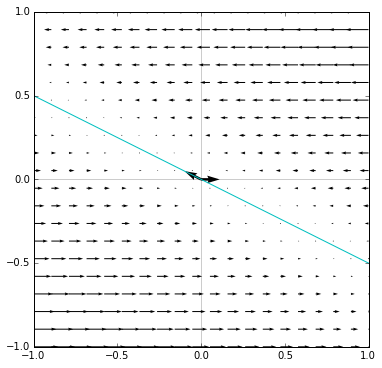

In [8]:
A = np.array([
    [-1., -2.],
    [0., 0.]])

fig, ax = phase(A, x1lim=(-1, 1), x2lim=(-1, 1), n1=20, n2=20)
x1 = np.linspace(-1, 1)
y1 = -.5*x1
ax.plot(x1, y1, 'c')

evals, evects = np.linalg.eig(A)
print evals
print evects[:,0]
print evects[:,1]
ax.quiver([0, 0], [0, 0], evects[0,:], evects[1,:], units='xy', scale_units='xy', angles='xy')

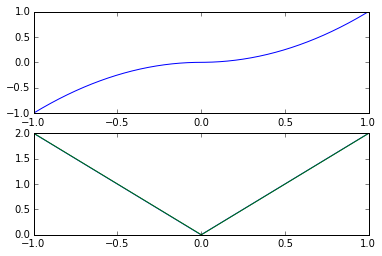

In [36]:
# check that d/dx(x|x|) = 2|x|

x, dx = np.linspace(-1, 1, 1000, retstep=True)
y = x*np.abs(x)
dydx = 2*np.abs(x)
dydx_num = np.diff(y)/dx

fig, axs = plt.subplots(nrows=2)
axs[0].plot(x,y)
axs[1].plot(x,dydx)
axs[1].plot(x[1:],dydx_num)